# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#import the necessary libraries

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [2]:
# keep the random seed
np.random.seed(11225)

dates = pd.date_range("2017-01-01", "2018-03-31")
epsilon = np.random.normal(0,5,len(dates))# create a series with the specified dates


In [3]:
avg = 0
std = 5
phi = .07

vals = []
Y = 8
for e in epsilon:
    Y= avg +phi * Y + e
    vals.append(Y)
    
ts = pd.Series(vals, index=dates)# store the parameters


In [4]:
# generate the time series according to the formula


Plot the time series and verify what you see

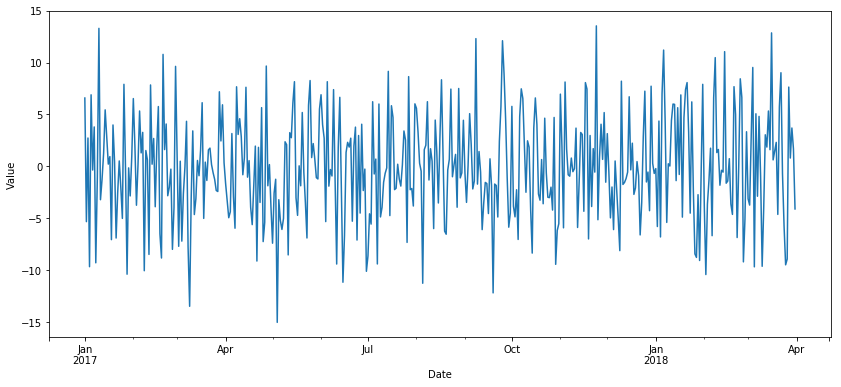

In [5]:
ax = ts.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show();# plot here

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

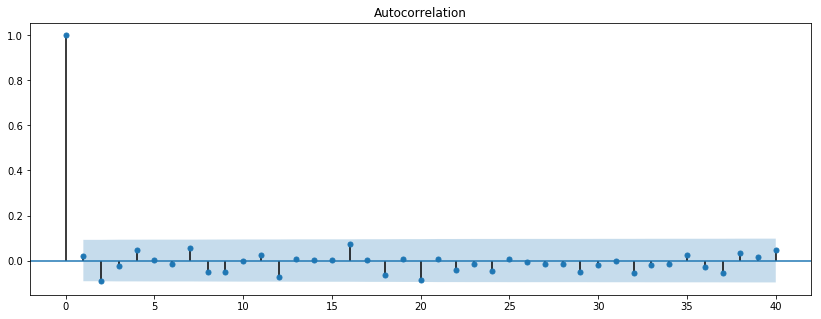

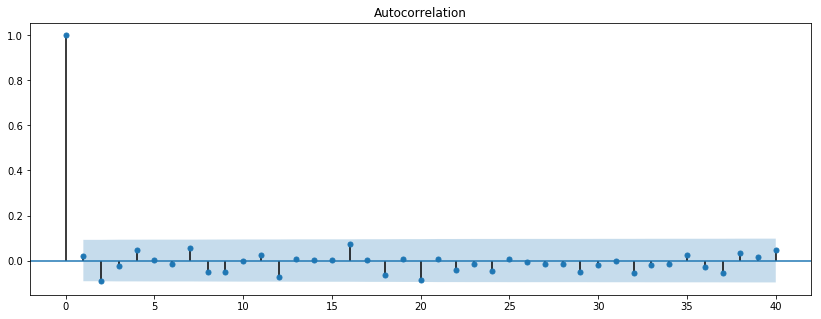

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5
plot_acf(ts, lags=40)


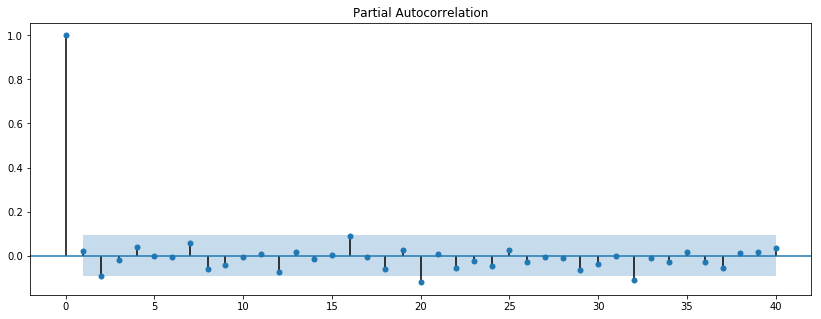

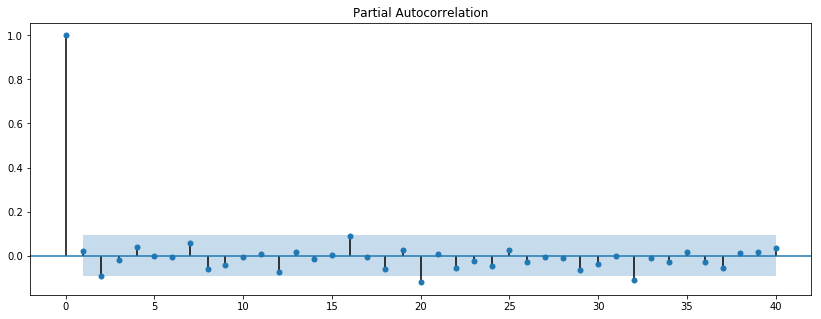

In [7]:
plot_pacf(ts, lags=40)

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [8]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood               -1382.555
Method:                       css-mle   S.D. of innovations              5.051
Date:                Thu, 10 Oct 2019   AIC                           2771.110
Time:                        11:26:18   BIC                           2783.471
Sample:                    01-01-2017   HQIC                          2775.980
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0850      0.241     -0.352      0.725      -0.558       0.388
ar.L1.y        0.0190      0.047      0.404      0.686      -0.073       0.111
                                    Roots           

/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` ins

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [10]:
# keep the random seed
np.random.seed(1234)

dates_2 = pd.date_range("2015-04-01", "2015-08-31")
epsilon = np.random.normal(0,4,len(dates)+1)

mu = 7
theta = .9

vals = []
y = 0

for i in range(len(epsilon)-1):
    y = epsilon[i] * theta+epsilon[i+1] + mu
    vals.append(y)
    
time_series = pd.Series(vals, index=dates)
# create a series with the specified dates


# store the parameters


#generate the time series


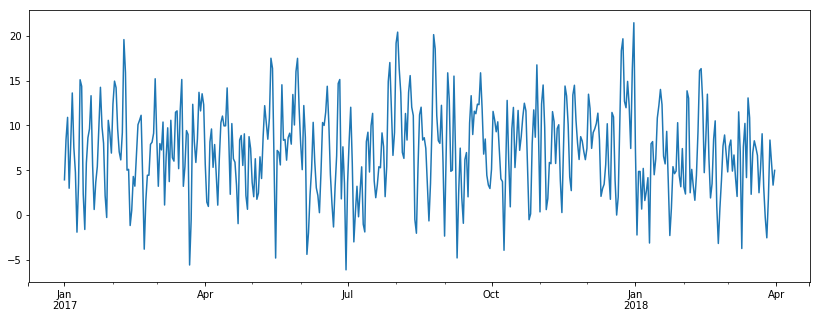

In [11]:
time_series.plot()# Plot the time series

## Look at the ACF and PACF of your model and write down your conclusions

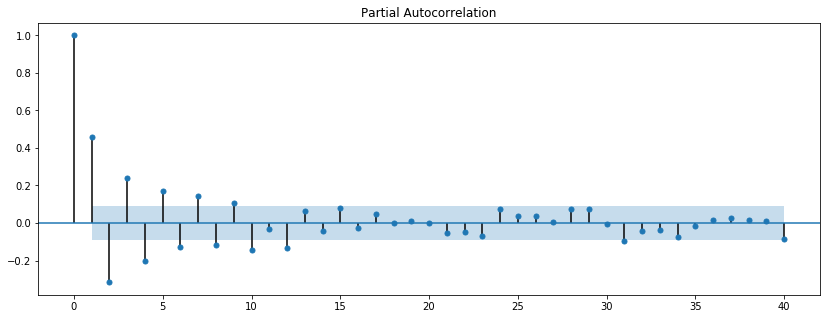

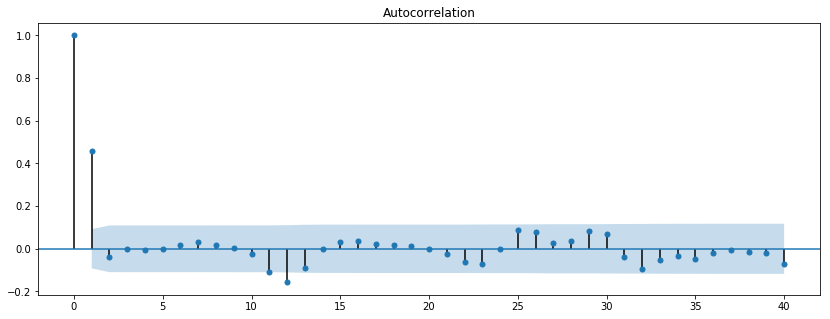

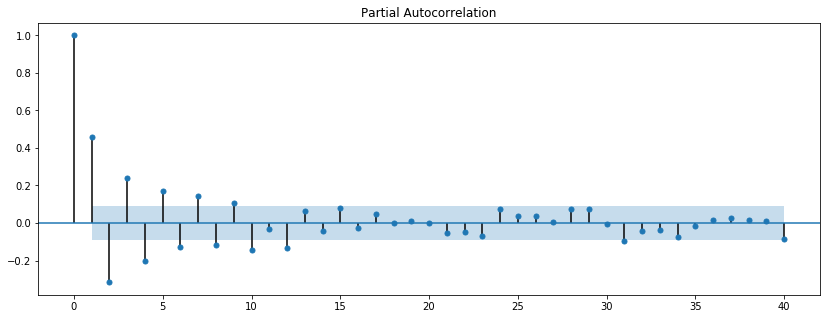

In [12]:
plot_acf(time_series, lags=40)
plot_pacf(time_series, lags=40)# plots here

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [13]:
mod_arma = ARMA(time_series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)# Fit an AR(1) model to the first simulated data


# Print out summary information on the fit


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood               -1321.275
Method:                       css-mle   S.D. of innovations              4.414
Date:                Thu, 10 Oct 2019   AIC                           2648.549
Time:                        11:39:44   BIC                           2660.910
Sample:                    01-01-2017   HQIC                          2653.419
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2591      0.381     19.059      0.000       6.513       8.006
ar.L1.y        0.4577      0.042     10.996      0.000       0.376       0.539
                                    Roots           

/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` ins

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [21]:
df = pd.read_csv('winning_400m.csv')
df.year = pd.to_datetime(df.year, format='%Y')# the data is in "winning_400m.csv"

In [22]:
df.set_index('year', inplace=True)

Plot the data

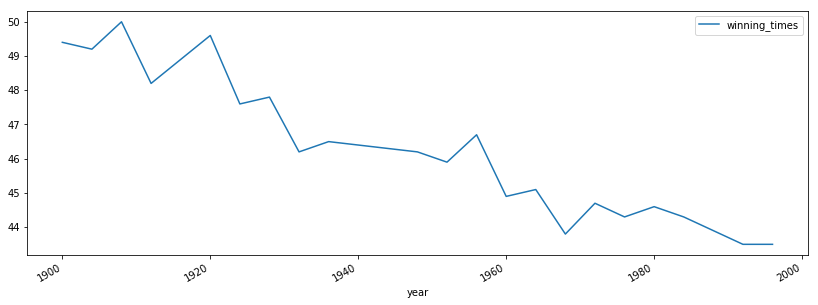

In [24]:
df.plot()# your code here

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [25]:
df.diff().dropna()# your code here

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


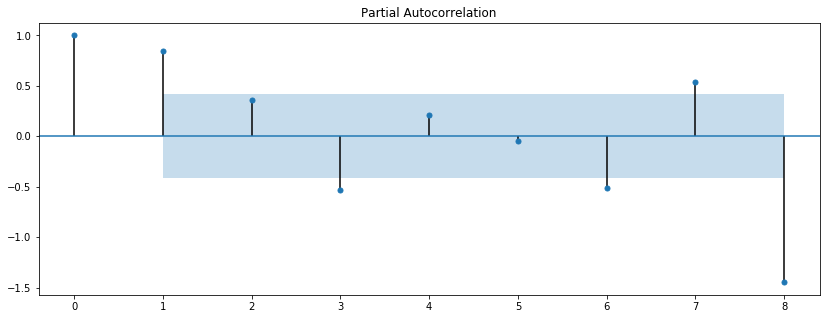

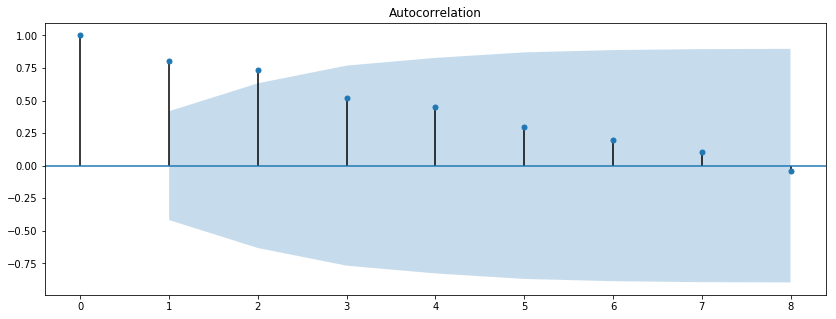

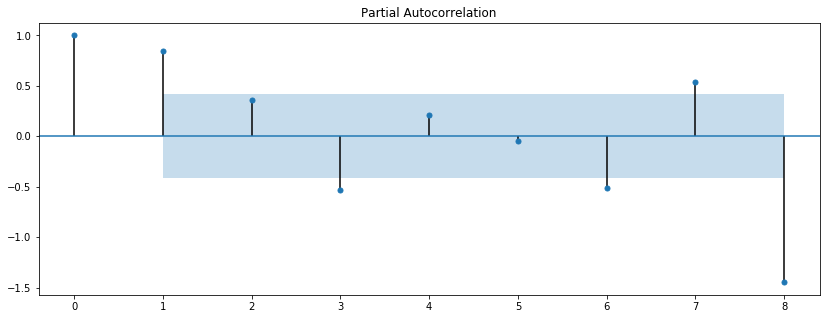

In [30]:
plot_acf(df, lags=8)
plot_pacf(df, lags=8)# Look at ACF and PACF

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [ ]:
# your code here

In [ ]:
# Try another one

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.